The emphasis for this project would be on the following:
1. Data Visualization and Analysis
2. Linear Models for Regression and Classification

In [1]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [2]:
# !pip install scikit-learn --user

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVC, SVC

## Part 1: Data Visualization and Analysis


### The dataset to be used for this section is car_price.csv.


In [4]:
# Load the dataset
car_price_df = pd.read_csv('car_price.csv')

<b> 1.1 Plot the distribution of the following features as a small multiple of histograms. </b>
1. carlength 
2. carwidth
3. stroke 
4. curbweight

<b></b>

array([[<AxesSubplot: title={'center': 'carlength'}>,
        <AxesSubplot: title={'center': 'carwidth'}>],
       [<AxesSubplot: title={'center': 'stroke'}>,
        <AxesSubplot: title={'center': 'curbweight'}>]], dtype=object)

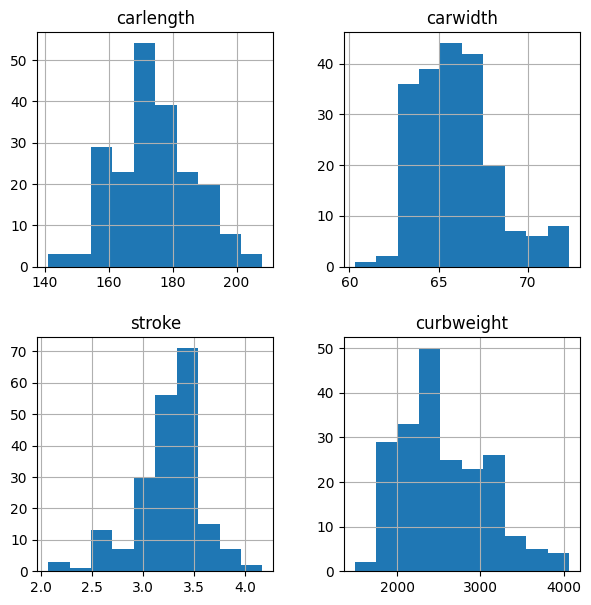

In [5]:

car_price_df.hist(column = ["carlength","carwidth","stroke","curbweight"],bins = 10,figsize = (7,7))

<b> 1.2 Plot a small multiple of bar charts to understand data distribution of the following categorical variables </b>
1. fueltype 
2. drivewheel
3. enginelocation


C:\Users\19176\AppData\Local\Temp\ipykernel_12564\2060524816.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


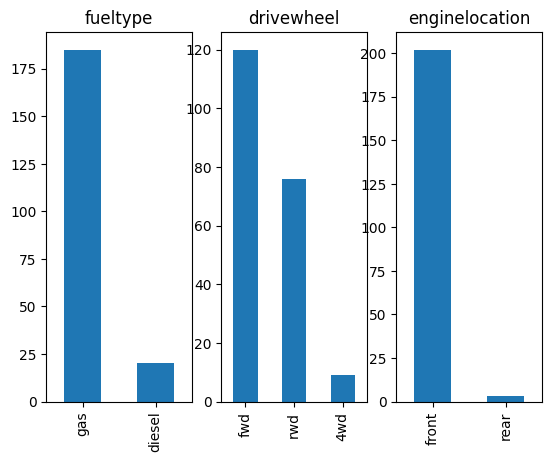

In [6]:

categorical_features = ["fueltype","drivewheel","enginelocation"]
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(car_price_df[categorical_features]):
    car_price_df[categorical_feature].value_counts().plot(kind = "bar", ax=ax[i]).set_title(categorical_feature)
fig.show()
# car_price_df[].value_counts().plot(kind="bar")

<b> 1.3 Plot relationships between the following features and the target variable <em>price</em> as a small multiple of boxplots. </b>
1. cylindernumber 
2. enginetype

<b> Note: Make sure to order the x-axis labels in increasing order for cylindernumber. </b>

In [7]:
cc = car_price_df.columns
print(cc)

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


<AxesSubplot: xlabel='enginetype', ylabel='price'>

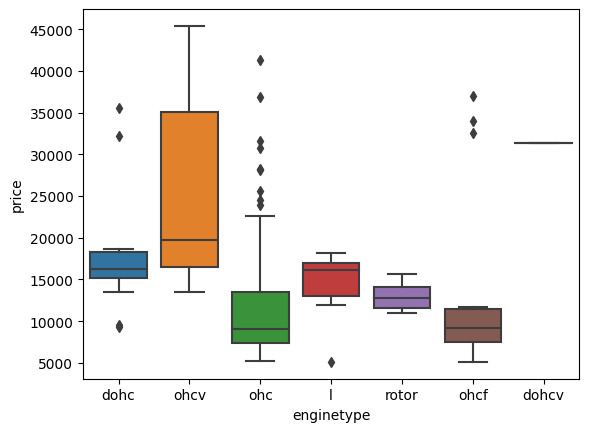

In [8]:

sns.boxplot(x= car_price_df["enginetype"],y = car_price_df["price"]) 

<AxesSubplot: xlabel='cylindernumber', ylabel='price'>

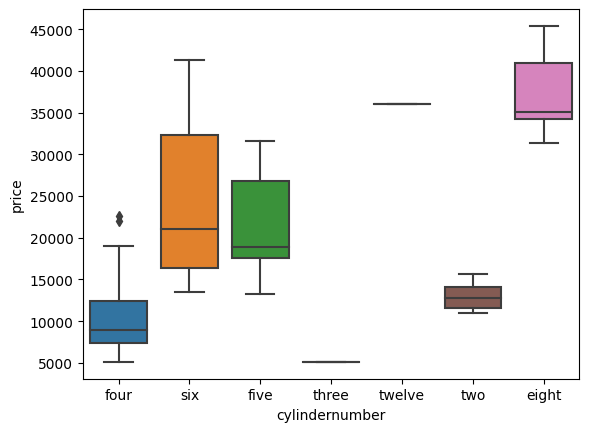

In [9]:
sns.boxplot(x= car_price_df["cylindernumber"],y = car_price_df["price"]) 

<b>Comment on the skewness of the distributions (histograms), class imbalance (bar charts), and relationship between categories and price of the car (boxplots). </b>


- from the boxplot of cylindernumber vs price we can see that price of cars with lower number of cylinders is lesser and more for more cylinders
- the bar chart is heavily skewed with most of the cars haviing engine location in the front and fuel type as gas
- the carlength is not skewed but curbweight is right skewed whereas the stroke is left skewed

------------------------------------------------------------------------------------------------------------------

## Part 2: Linear Models for Regression and Classification

In this section, we will be implementing two linear models **linear regression and logistic regression**. We will see that despite some of their differences at the surface, these linear models (and many machine learning models in general) are fundamentally doing the same thing - that is, optimizing model parameters to minimize a loss function on data.

In part 1, we will use two datasets - synthetic and Car Price to train and evaluate our linear regression model.

### Synthetic Data

<b>2.1.1 Generate 100 samples of synthetic data using the following equations. </b>

$ \epsilon ∼ \mathcal{N}(0,4) $

$ y = 7x - 8 + \epsilon $

You may use [np.random.normal()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) for generating $\epsilon$. 

In [11]:
np.random.seed(0)
X = np.linspace(0, 15, 100)
epsilon = np.random.normal(0,4,100)
y = 7*X -8 + epsilon

In [12]:
print(epsilon)

[  7.05620938   1.60062883   3.91495194   8.9635728    7.47023196
  -3.90911152   3.80035367  -0.60542883  -0.41287541   1.64239401
   0.57617428   5.81709403   3.0441509    0.48670007   1.77545293
   1.33469731   5.97631629  -0.82063306   1.25227081  -3.41638296
 -10.21195926   2.61447438   3.4577448   -2.96866008   9.0790185
  -5.8174627    0.18303407  -0.7487354    6.13111686   5.87743508
   0.6197897    1.51265008  -3.55114299  -7.92318587  -1.3916486
   0.62539588   4.92116272   4.8095194   -1.54930727  -1.209211
  -4.19421186  -5.68007175  -6.82508076   7.80310158  -2.03860873
  -1.75229721  -5.01118144   3.10996142  -6.45559139  -0.85096112
  -3.58186624   1.54760999  -2.04322055  -4.72252874  -0.11272891
   1.71332748   0.26606889   1.20988759  -2.53728837  -1.45096466
  -2.68984179  -1.43821265  -3.25258513  -6.90513041   0.70970457
  -1.60712374  -6.52079339   1.85112902  -3.62919346   0.20778158
   2.91636225   0.51593164   4.55760274  -4.93930328   1.60936656
  -2.73924036 

To apply linear regression, we need to first check if the assumptions of linear regression are not violated.

Assumptions of Linear Regression:

*   Linearity:  is a linear (technically affine) function of $x$.
*   Independence: the $x$'s are independently drawn, and not dependent on each other.
*   Homoscedasticity: the $\epsilon$'s, and thus the $y$'s, have constant variance.
*   Normality: the $\epsilon$'s are drawn from a Normal distribution (i.e. Normally-distributed errors)

These properties, as well as the simplicity of this dataset, will make it a good test case to check if our linear regression model is working properly.

**2.1.2 Plot y vs X in the synthetic dataset as a scatter plot.**

Text(0, 0.5, 'y')

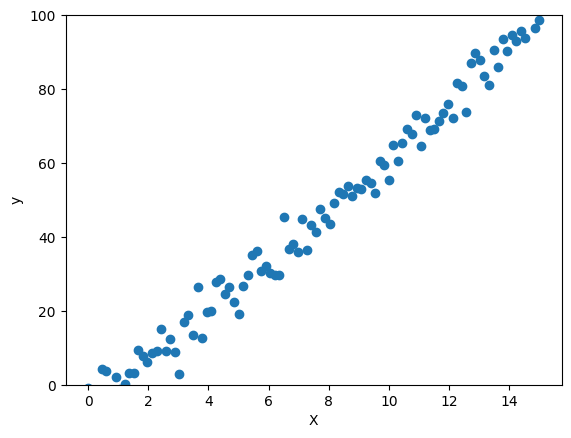

In [13]:

plt.scatter(X,y)
plt.ylim(0,100)
plt.xlabel("X")
plt.ylabel("y")

In [1]:
#its a linear relationship between X and Y

### Car Price Prediction Dataset

The objective of this dataset is to predict the price of a car based on its characterisitics. We will use linear regression to predict the price using its features. 

In [15]:
# split data into features and labels
car_price_X = car_price_df.drop(columns=['price'])
car_price_y = car_price_df['price']

**2.1.3 Plot the relationships between the label (price) and the continuous features (citympg, highwaympg, enginesize, horsepower) using a small multiple of scatter plots.**

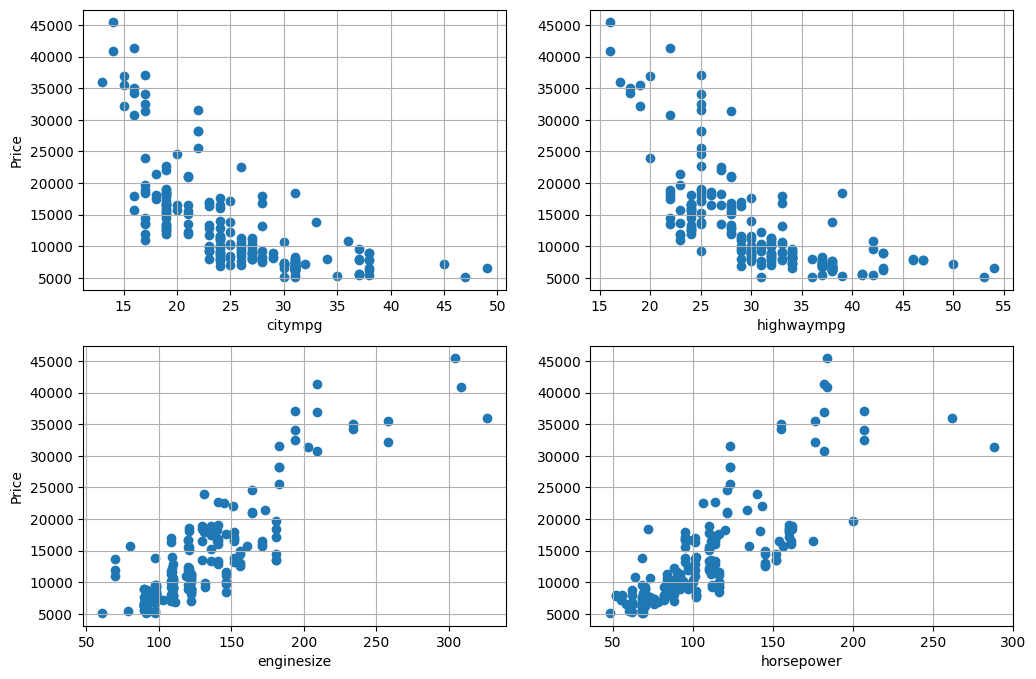

In [16]:
### Code here
plt.rcParams["figure.figsize"] = (12,8)
plt.subplot(2,2,1)
plt.scatter(car_price_df["citympg"],car_price_y)
plt.xlabel("citympg")
plt.ylabel("Price")
plt.grid()
plt.subplot(2,2,2)
plt.scatter(car_price_df["highwaympg"],car_price_y)
plt.xlabel("highwaympg")
plt.grid()
plt.subplot(2,2,3)
plt.scatter(car_price_df["enginesize"],car_price_y)
plt.xlabel("enginesize")
plt.ylabel("Price")
plt.grid()
plt.subplot(2,2,4)
plt.scatter(car_price_df["horsepower"],car_price_y)
plt.xlabel("horsepower")
plt.grid()

In [2]:

#the variables are fairly linear and since linear regression assumes a linear relationship, linear regression model is a good one
#citympg and highwaympg are negatively correlated with price whereas enginesize and horsepower are positevly correlated

### Data Preprocessing

Before we can fit a linear regression model, there are several pre-processing steps we should apply to the datasets:

1. Encode categorial features appropriately.
2. Remove highly collinear features by reading the correlation plot.
3. Split the dataset into training (60%), validation (20%), and test (20%) sets.
4. Standardize the columns in the feature matrices X_train, X_val, and X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
5. Add a column of ones to the feature matrices X_train, X_val, and X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.



In [18]:
X = X.reshape((100, 1))   # Turn the X vector into a feature matrix X

# 1. No categorical features in the synthetic dataset (skip this step)

# 2. Only one feature vector

# 3. Split the dataset into training (60%), validation (20%), and test (20%) sets
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=0)

# 4. Standardize the columns in the feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # Fit and transform scalar on X_train
X_val = scaler.transform(X_val)           # Transform X_val
X_test = scaler.transform(X_test)         # Transform X_test

# 5. Add a column of ones to the feature matrices
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

print(X_train[:5], '\n\n', y_train[:5])

[[ 1.          0.53651502]
 [ 1.         -1.00836082]
 [ 1.         -0.72094206]
 [ 1.         -0.25388657]
 [ 1.          0.64429705]] 

 [55.47920661 13.42527931 26.39143796 36.62805794 65.38959977]


**2.1.5 Encode the categorical variables of the CarPrice dataset.**

In [19]:
print(car_price_X.shape)
car_price_X = pd.get_dummies(car_price_X, columns = ["fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","enginetype","cylindernumber","fuelsystem"],prefix_sep='_',sparse = True, drop_first = True)

(205, 25)


In [20]:
print(car_price_X.shape)

print(car_price_X)

(205, 45)
     car_ID  symboling                   CarName  wheelbase  carlength  \
0         1          3        alfa-romero giulia       88.6      168.8   
1         2          3       alfa-romero stelvio       88.6      168.8   
2         3          1  alfa-romero Quadrifoglio       94.5      171.2   
3         4          2               audi 100 ls       99.8      176.6   
4         5          2                audi 100ls       99.4      176.6   
..      ...        ...                       ...        ...        ...   
200     201         -1           volvo 145e (sw)      109.1      188.8   
201     202         -1               volvo 144ea      109.1      188.8   
202     203         -1               volvo 244dl      109.1      188.8   
203     204         -1                 volvo 246      109.1      188.8   
204     205         -1               volvo 264gl      109.1      188.8   

     carwidth  carheight  curbweight  enginesize  boreratio  ...  \
0        64.1       48.8        2

**2.1.6 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop one from each pair of highly correlated features from the dataframe.?**

C:\Users\19176\AppData\Local\Temp\ipykernel_12564\2006342155.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(car_price_df.corr(), annot=True)


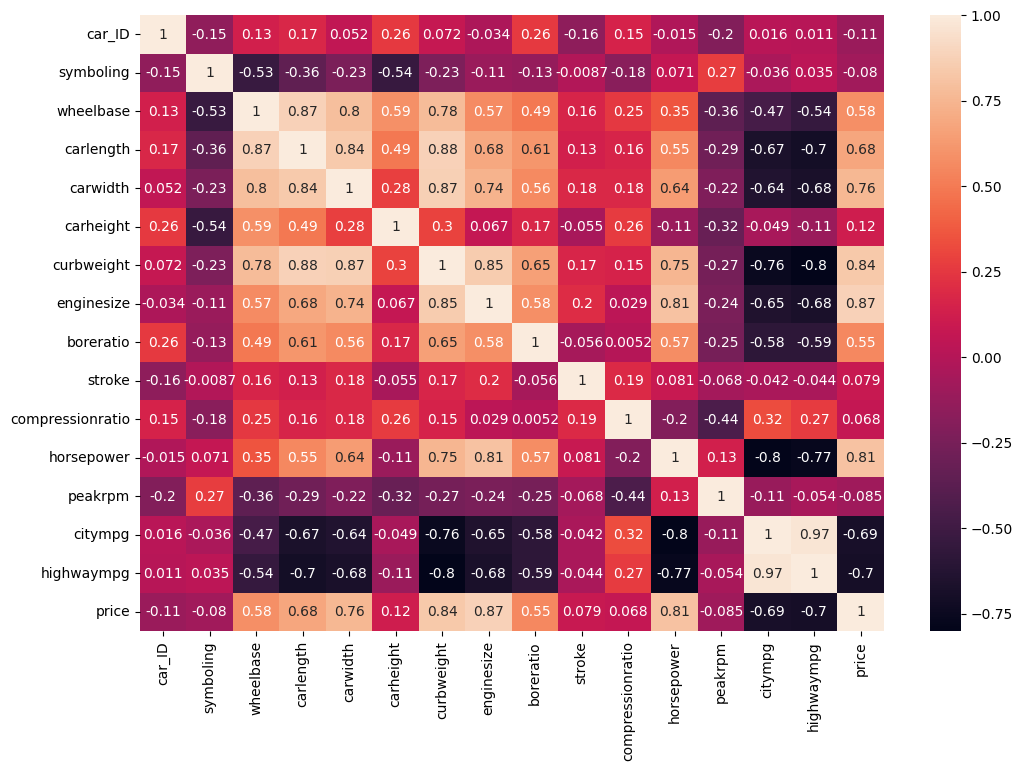

In [21]:
### Code here
ax = sns.heatmap(car_price_df.corr(), annot=True)

In [22]:
#as we see citympg and highwaympg are highly correlated. We can remove citympg. Having highly correlated vriables mean that the same information is present and causes multicolinearity. This drops the performance of the linear regression model

In [23]:
# there is also a column with the car name, this column can be dropped as it will not lead to useful information which can predict price

In [24]:
car_price_X = car_price_X.drop(columns=['citympg'])
car_price_X = car_price_X.drop(columns=['CarName'])

**2.1.7 Split the dataset into training (60%), validation (20%), and test (20%) sets. Use random_state = 0.**

In [25]:

car_price_X_dev, car_price_X_test, car_price_y_dev, car_price_y_test = train_test_split(car_price_X, car_price_y, test_size=0.2, random_state=0)
car_price_X_train, car_price_X_val, car_price_y_train, car_price_y_val = train_test_split(car_price_X_dev, car_price_y_dev, test_size=0.25, random_state=0)

In [26]:
car_price_y_test.shape

(41,)

**2.1.8 Standardize the columns in the feature matrices.**

In [27]:
### Code here
scaler = StandardScaler()
car_price_X_train = scaler.fit_transform(car_price_X_train)   # Fit and transform scalar on X_train
car_price_X_val = scaler.transform(car_price_X_val)           # Transform X_val
car_price_X_test = scaler.transform(car_price_X_test)

C:\Users\19176\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\19176\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\19176\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\19176\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


**2.1.9 Add a column of ones to the feature matrices for the bias term.**

In [28]:

car_price_X_train = np.hstack([np.ones((car_price_X_train.shape[0], 1)), car_price_X_train])
car_price_X_val = np.hstack([np.ones((car_price_X_val.shape[0], 1)), car_price_X_val])
car_price_X_test = np.hstack([np.ones((car_price_X_test.shape[0], 1)), car_price_X_test])

### Implement Linear Regression

Now, we can implement our linear regression model! Specifically, we will be implementing ridge regression, which is linear regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for linear regression is:

$$
y = X w
$$

Note that we can omit the bias term here because we have included a column of ones in our $X$ matrix, so the bias term is learned implicitly as a part of $w$. This will make our implementation easier.

Our objective in linear regression is to learn the weights $w$ which best fit the data. This notion can be formalized as finding the optimal $w$ which minimizes the following loss function:

$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

This is the ridge regression loss function. The $\| X w - y \|^2_2$ term penalizes predictions $Xw$ which are not close to the label $y$. And the $\alpha \| w \|^2_2$ penalizes large weight values, to favor a simpler, more generalizable model. The $\alpha$ hyperparameter, known as the regularization parameter, is used to tune the complexity of the model - a higher $\alpha$ results in smaller weights and lower complexity, and vice versa. Setting $\alpha = 0$ gives us vanilla linear regression.

Conveniently, ridge regression has a closed-form solution which gives us the optimal $w$ without having to do iterative methods such as gradient descent. The closed-form solution, known as the Normal Equations, is given by:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$

**2.1.10 Implement a `LinearRegression` class with two methods: `train` and `predict`.**


In [29]:
# from numpy import det
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        None
        '''
        self.w = np.dot(np.dot(np.linalg.pinv(np.dot(X.T,X) + self.alpha*np.identity(X.shape[1])),X.T),y)
        return self.w
        
    def predict(self, X):
        '''Predicts on X using trained model.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        y_pred = X.dot(self.w)
        return y_pred

### Train, Evaluate, and Interpret LR Model

**2.1.11 Using the `LinearRegression` implementation above to train a vanilla linear regression model ($\alpha = 0$) on (X_train, y_train) from the synthetic dataset. Use this trained model to predict on X_test. Report the first 3 and last 3 predictions on X_test, along with the actual labels in y_test.**

In [30]:

a = LinearRegression()
a.train(X_train,y_train)

array([46.05572051, 29.15819725])

In [33]:
y_pred = a.predict(X_test)
print("First 3 pred values",y_pred[:3])
print("Last 3 pred values",y_pred[-3:])
print("First 3 actual test values",y_test[:3])
print("Last 3 Actual test values",y_test[-3:])

First 3 pred values [19.79646675 82.65106352 -5.34537196]
Last 3 pred values [17.70131352 27.12950304  0.94008772]
First 3 actual test values [19.75879164 87.9272395  -1.96383594]
Last 3 Actual test values [26.53356395 19.07681413  0.07197308]


In [34]:
print(X_test[:,1:].shape)
print(y_test.shape)

(20, 1)
(20,)


In [35]:
print(y_pred.shape)

(20,)


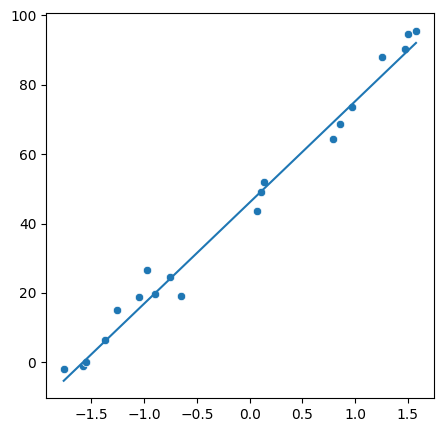

In [36]:

fig,axs = plt.subplots(1,1,figsize=(5,5))
sns.scatterplot(y = y_test,x = X_test[:,1])
sns.lineplot(y = y_pred,x = X_test[:,1])
plt.show()
# plt.plot(w)
# plt.plot(y_pred)

**2.1.13 Train a linear regression model ($\alpha = 0$) on the car price training data. Make predictions and report the $R^2$ score on the training, validation, and test sets. Report the first 3 and last 3 predictions on the test set, along with the actual labels.**

In [37]:
### Code here
b = LinearRegression()
weights = b.train(car_price_X_train,car_price_y_train)
car_price_train_pred = b.predict(car_price_X_train)
print(r2_score(y_true = car_price_y_train,y_pred = car_price_train_pred))
print("first 3 train predictions are: " ,car_price_train_pred[:3])
print("last 3 train predictions are: " ,car_price_train_pred[-3:])

car_price_val_pred = b.predict(car_price_X_val)
print(r2_score(y_true = car_price_y_val,y_pred = car_price_val_pred))
print("first 3 val predictions are: " ,car_price_val_pred[:3])
print("last 3 val predictions are: " ,car_price_val_pred[-3:])


car_price_test_pred = b.predict(car_price_X_test)
print(r2_score(y_true = car_price_y_test,y_pred = car_price_test_pred))
print("first 3 test predictions are: " ,car_price_test_pred[:3])
print("first 3 actual test values are:",car_price_y_test[:3].values)
print("last 3 test predictions are: " ,car_price_test_pred[-3:])
print("last 3 actual test values are:",car_price_y_test[-3:].values)

0.9661733430613246
first 3 train predictions are:  [ 9388.36699281 24685.38300693 18280.50715427]
last 3 train predictions are:  [ 5536.39550656  7918.76326654 18360.84338055]
0.8627372154369534
first 3 val predictions are:  [12633.74243606  9312.02224344 13696.45005793]
last 3 val predictions are:  [ 8554.5877285  19401.5472189  11617.13688393]
0.8701950583331881
first 3 test predictions are:  [ 5825.56063064 20108.04213798 14489.38281665]
first 3 actual test values are: [ 6795. 15750. 15250.]
last 3 test predictions are:  [ 6085.42430301 35994.86791569  6317.01029559]
last 3 actual test values are: [ 6377.  45400.   8916.5]


C:\Users\19176\AppData\Local\Temp\ipykernel_12564\1215570689.py:18: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print("first 3 actual test values are:",car_price_y_test[:3].values)
C:\Users\19176\AppData\Local\Temp\ipykernel_12564\1215570689.py:20: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print("last 3 actual test values are:",car_price_y_test[-3:].values)


**2.1.14 Report the $R^2$ on the training, validation, and test sets using this baseline.** 

>This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression $R^2$ should be much higher than these baseline $R^2$.

In [38]:

base = car_price_y_train.mean()
car_price_y_train_base = np.zeros_like(car_price_y_train)+base
print("Training baseline:",r2_score(y_true=car_price_y_train,y_pred = car_price_y_train_base))

Training baseline: 0.0


In [39]:
car_price_y_test_base = np.zeros_like(car_price_y_test)+base
print("Testing baseline:",r2_score(y_true=car_price_y_test,y_pred = car_price_y_test_base))

Testing baseline: -0.0028042246944892657


In [40]:
car_price_y_val_base = np.zeros_like(car_price_y_val)+base
print("Val baseline:",r2_score(y_true=car_price_y_val,y_pred = car_price_y_val_base))

Val baseline: -0.04252409813108615


**2.1.15 Interpret your model trained on the car price dataset using a bar chart of the model weights**

In [41]:

weights

array([ 1.36303347e+04, -5.36945590e+02,  1.98759344e+02,  7.10164418e+02,
       -3.53819751e+02,  7.42707876e+02,  4.16022179e+02,  3.20743811e+03,
        2.80074545e+03, -4.20448777e+02, -6.22922285e+02, -1.18198352e+03,
       -1.61508165e+02,  9.19838947e+02,  2.09583881e+02, -7.87180543e+02,
        1.01148538e+03, -4.14459969e+02, -6.88688501e+02, -1.25412246e+03,
       -1.31093841e+03, -1.52500110e+03,  6.96288726e+02,  1.59728134e+03,
        1.31730566e+03, -1.07623971e-11, -9.87956352e+02,  8.64862977e+02,
        7.70309473e+02, -1.36821839e+03, -3.71052597e+02, -2.76097292e+03,
       -4.88559560e+03, -1.99851121e+03, -1.15980802e-12, -2.52047687e+02,
       -3.71052597e+02,  3.57471013e+02, -1.38468618e+02,  7.87180543e+02,
        0.00000000e+00,  2.93176761e+02, -4.44744576e+02,  0.00000000e+00])

In [42]:
l = ["bias"]
l.extend(car_price_X.columns)

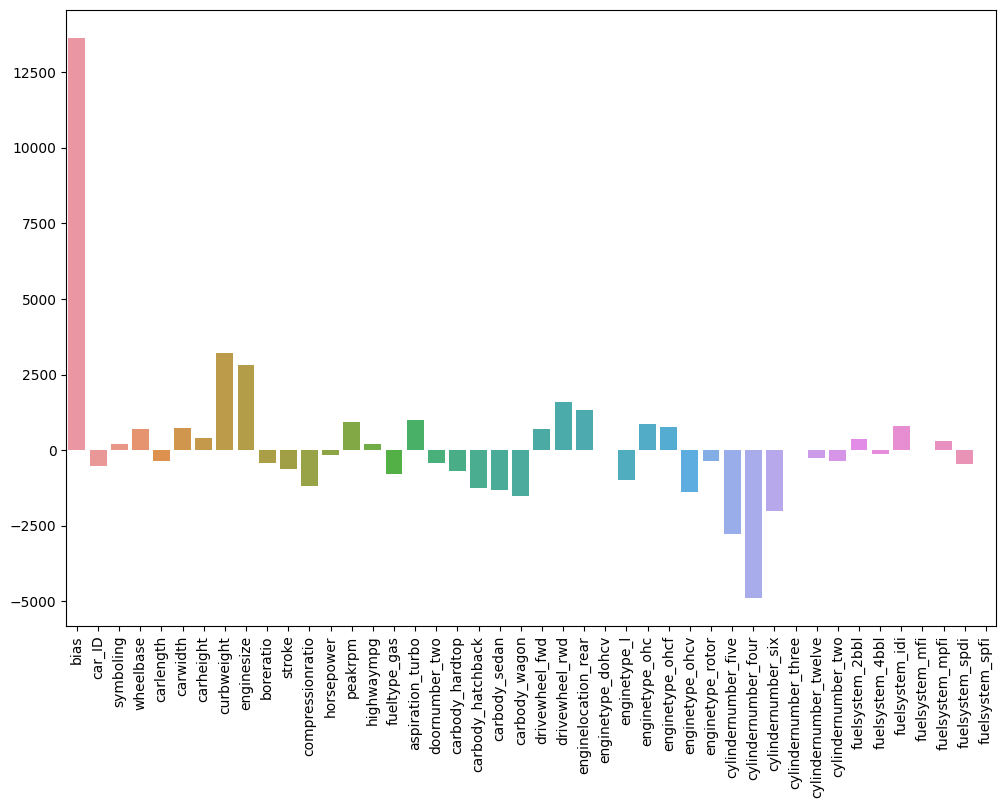

In [43]:
sns.barplot(x=l,y=weights)
plt.xticks(rotation=90)
plt.show()

**2.1.16 Which features are the greatest contributors to the car price?**

In [44]:

# the highest importance is given to bias which may be cause of factors not presented wuth our variables (like brand value etc)
# the next highest important feature that contributes to price is cylinder number(especially 4 cylinder cars)
# features like engine size and curbweight contribute a lot towards the final price of the car
#features of ["enginesize","curbweight","cylindernumber_four","cylindernumber_five","cylindernumber_six"] are the most important

### Hyperparameter Tuning ($\alpha$)

Now, let's do ridge regression and tune the $\alpha$ regularization parameter on the car price dataset.

**2.1.17 Sweep out values for $\alpha$ using alphas = np.logspace(-5, 1, 20). Perform a grid search over these $\alpha$ values, recording the training and validation $R^2$ for each $\alpha$. Plot the training and validation $R^2$ as a function of $\alpha$ on a single figure.log scale for the x-axis.**

Text(0.5, 0, 'Alpha')

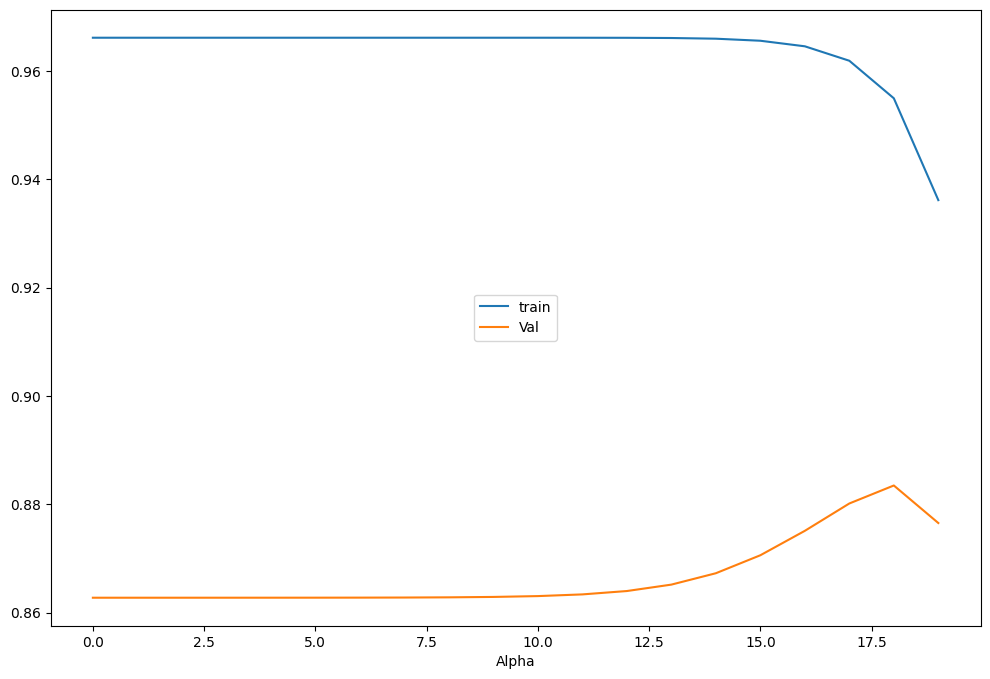

In [45]:
### Code here
### Code here

r2_score_train = []
r2_score_val = []
weights_new = []
# alpha = []
# print(np.logspace(-5,1,20))
alphas = np.logspace(-5,1,20)
for a in alphas:
    c =LinearRegression(a)
    weights_new.append(c.train(car_price_X_train,car_price_y_train))
    car_price_train_pred = c.predict(car_price_X_train)
    r2_score_train.append(r2_score(y_true = car_price_y_train,y_pred = car_price_train_pred))
    car_price_val_pred = c.predict(car_price_X_val)
    r2_score_val.append(r2_score(y_true = car_price_y_val,y_pred = car_price_val_pred))

plt.plot(r2_score_train,label="train")
plt.plot(r2_score_val,label="Val")
plt.legend(loc="center")
plt.xlabel("Alpha")
# plt.xlabel(np.logspace(-5,1,20))
# plt.plot(np.logspace(-5,1,20))
# a = LinearRegression()
# a.train(X_train,y_train)

In [46]:

#as the alpha increases the training r2 score continues to drop but the val r2 score increases upto a point and drop after that

### 2.2 Logistic Regression

In this part, we will be using a heart disease dataset for classification. 

The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides information about patients, over 4,000 records and 15 attributes.


**Variables:**

Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

Demographic:
- Sex: male or female(Nominal)
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral:
- Current Smoker: whether or not the patient is a current smoker (Nominal)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history):
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current):
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)

Predict variable (desired target):
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [47]:
heart_disease_df = pd.read_csv('heart_disease.csv')
heart_disease_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#### Missing Value Analysis


In [48]:

heart_disease_df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [49]:
heart_disease_df.dropna(inplace=True)

In [50]:
heart_disease_df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [51]:
#  we have dropped the rows with missing values since the number was not a lot

**2.2.2 Find the probability of the different categories.**

In [52]:

print(heart_disease_df["TenYearCHD"].value_counts())
print("probability of class 0:",heart_disease_df["TenYearCHD"].value_counts()[0]/len(heart_disease_df))
print("probability of class 1:",heart_disease_df["TenYearCHD"].value_counts()[1]/len(heart_disease_df))

0    3099
1     557
Name: TenYearCHD, dtype: int64
probability of class 0: 0.8476477024070022
probability of class 1: 0.15235229759299782


In [53]:

# not balanced labels
# more labels with "0"

**2.2.3 Plot the correlation matrix (first separate features and Y variable), and check if there is high correlation between the given numerical features (Threshold >=0.9).**

In [54]:

# split data into features and labels
heart_disease_X = heart_disease_df.drop(columns=['TenYearCHD'])
heart_disease_y = heart_disease_df['TenYearCHD']

<AxesSubplot: >

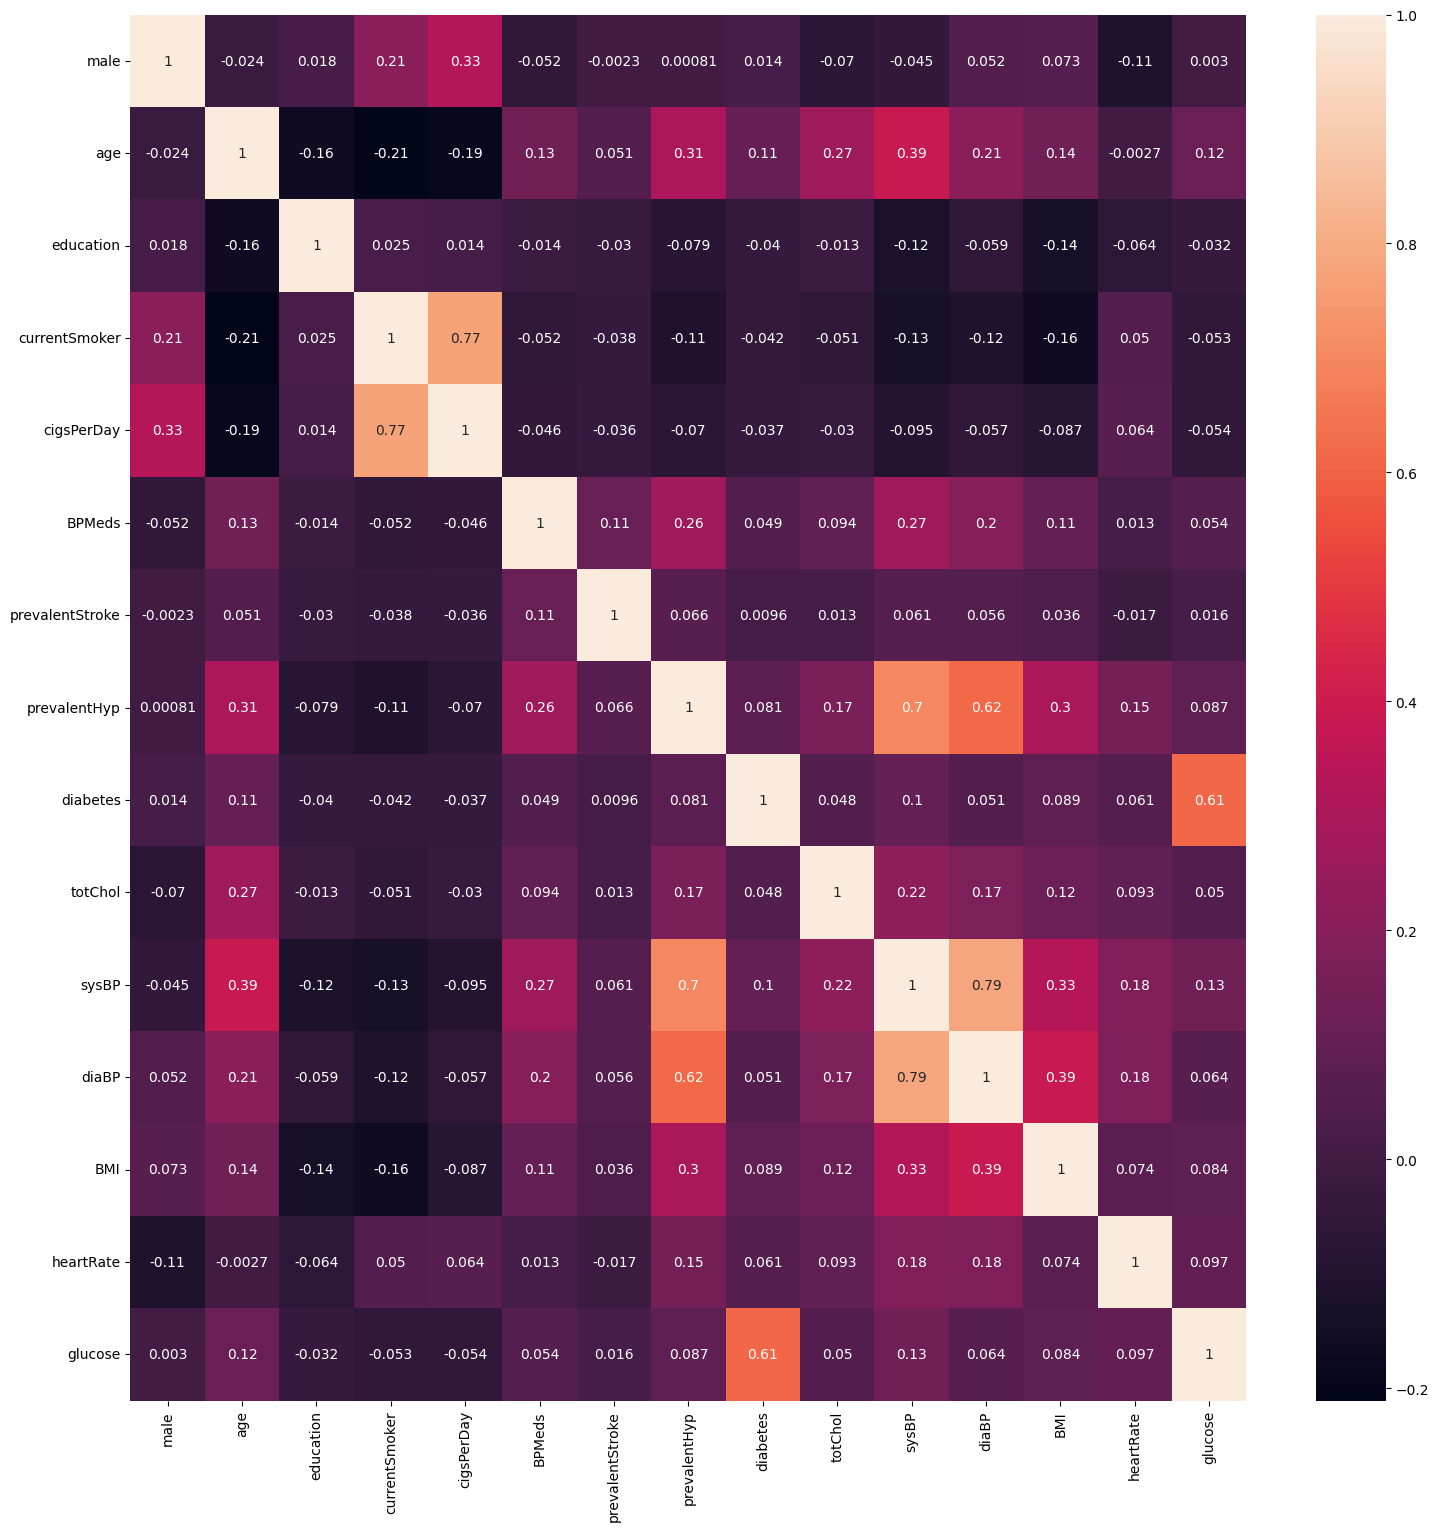

In [55]:
plt.figure(figsize=(18,18))
sns.heatmap(heart_disease_X.corr(), annot=True)

In [56]:
# there are no columns that are highly correlated (>=90) so we need not drop any columns

**2.2.4 Apply the following pre-processing steps:**

1. Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.
4. Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [57]:
heart_disease_y.shape

(3656,)

In [58]:

heart_disease_y = heart_disease_y.values.reshape((heart_disease_y.shape[0],1))

In [59]:
heart_disease_y.shape

(3656, 1)

In [60]:
X_dev, X_test, y_dev, y_test = train_test_split(heart_disease_X, heart_disease_y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=0)

# 4. Standardize the columns in the feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # Fit and transform scalar on X_train
X_val = scaler.transform(X_val)           # Transform X_val
X_test = scaler.transform(X_test)         # Transform X_test

# 5. Add a column of ones to the feature matrices
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

print(X_train[:5], '\n\n', y_train[:5])

[[ 1.          1.10947093  1.4718344  -0.96232538 -0.95845457 -0.74500255
  -0.17752347 -0.07722242 -0.66825887 -0.16627571  0.60079213  0.12520652
  -0.24664238  0.51694627 -2.15100438 -0.07698024]
 [ 1.         -0.90133051 -1.12062745  0.00308155  1.04334626  0.10455836
  -0.17752347 -0.07722242 -0.66825887 -0.16627571 -0.49865133 -0.89891325
  -0.54085384  0.33957544 -0.07171784 -0.20135476]
 [ 1.         -0.90133051 -0.76710993  0.00308155 -0.95845457 -0.74500255
  -0.17752347 -0.07722242 -0.66825887 -0.16627571  0.62322976 -0.05685922
  -0.16258197 -0.44627585  2.00756869  0.50343415]
 [ 1.          1.10947093 -0.64927075  0.96848849  1.04334626  1.20898754
  -0.17752347 -0.07722242 -0.66825887 -0.16627571  0.75785549 -0.78512217
  -0.58288404 -0.41425056  0.34413946 -0.20135476]
 [ 1.         -0.90133051 -1.59198415  0.00308155 -0.95845457 -0.74500255
  -0.17752347 -0.07722242 -0.66825887 -0.16627571 -0.65571468 -1.14925364
  -0.79303508 -1.04736587 -0.07171784 -0.36718744]] 

 [

### Implement Logistic Regression

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
> 
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


**A LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid has been implemented for you below.**

In [61]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''
        
        loss = list()
        self.w = np.zeros((X.shape[1],1))
        for i in np.arange(self.t): 
            self.w = self.w - (self.eta * self.calculate_gradient(X, y))
            loss.append(self.calculate_loss(X, y))
        return loss
        
    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold 
        the predicted probability to return a 0 or 1 prediction.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        y_pred = self.calculate_sigmoid(X.dot(self.w))
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred
    
    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w, 
        and alpha. Useful as a helper function for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha*np.linalg.norm(self.w, ord=2)**2
    
    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss 
        using X, y, w, and alpha. Useful as a helper function 
        for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        return X.T.dot(self.calculate_sigmoid( X.dot(self.w)) - y) + 2*self.alpha*self.w        
            
    
    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x. 
        Useful as a helper function for predict(), calculate_loss(), 
        and calculate_gradient().
        
        Parameters
        ----------
        x: (m x 1) vector
        
        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        return (1)/(1 + np.exp(-x.astype('float')))

**2.2.5 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.**

A: Train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the voice recognition training data. Plot the training loss over epochs. 

B: Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)**, find the best hyperparameters for LogisticRegression.

C. Compare accuracy on the test dataset for both the scenarios.

In [62]:

l = LogisticRegression()
loss = l.train(X_train,y_train)

In [63]:
print(loss[0])

[[1025.36509126]]


In [64]:
flat_list = [item for sublist in loss for item in sublist]

In [65]:
print(flat_list[0])

[1025.36509126]


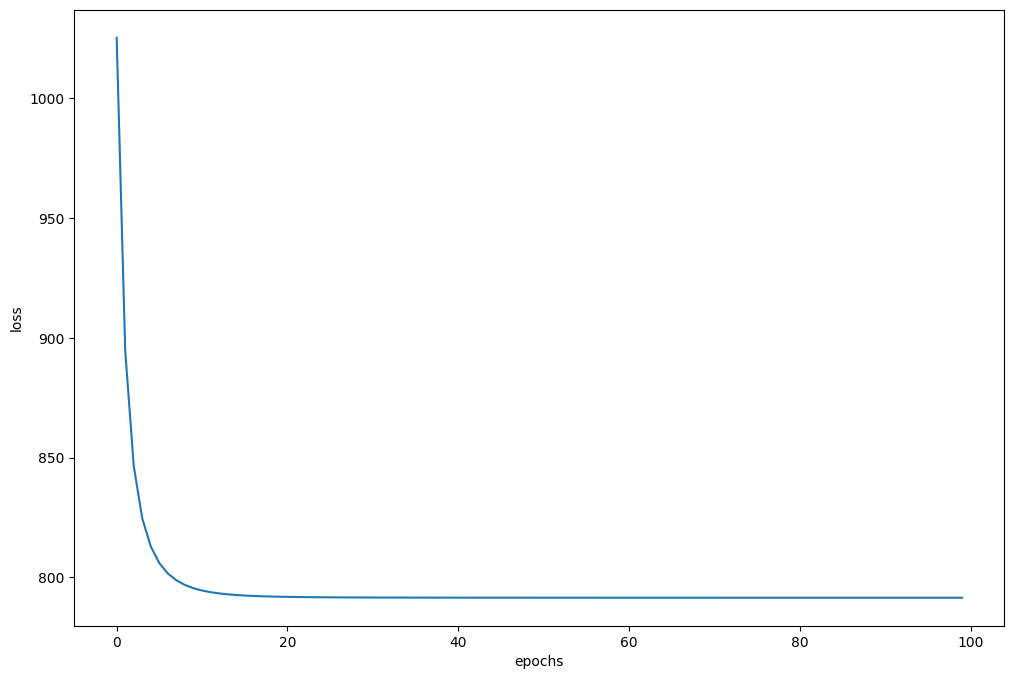

In [66]:
epoch = []
for i in range(100):
    epoch.append(i)
plt.plot(epoch,flat_list)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [67]:
import random

In [68]:
scores = []
np.random.seed(100)
a = np.random.uniform(0,1,(20,))
e = np.random.uniform(0,0.001,(20,))
tt = np.random.randint(low = 0,high = 100,size = (20,))
for i in range(20):
    model = LogisticRegression(a[i],e[i],tt[i])
    loss = model.train(X_train,y_train)
    heart_y_pred = model.predict(X_val)
    scores.append(model.calculate_loss(X_val,y_val))
    
val_loss = np.reshape(scores,(-1))
idx = np.argmin(val_loss)

C:\Users\19176\AppData\Local\Temp\ipykernel_12564\4232524235.py:102: RuntimeWarning: overflow encountered in exp
  return (1)/(1 + np.exp(-x.astype('float')))
C:\Users\19176\AppData\Local\Temp\ipykernel_12564\4232524235.py:70: RuntimeWarning: divide by zero encountered in log
  return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha*np.linalg.norm(self.w, ord=2)**2


In [69]:
model_ = LogisticRegression()
model_.train(np.concatenate([X_train,X_val]),np.concatenate([y_train,y_val]))
pred_ = model_.predict(X_test)
acc1 = np.count_nonzero(np.reshape((pred_==y_test),(-1)))/len(X_test)
print("Model Accuracy with base parameters: ", acc1)

model_reg = LogisticRegression(alpha = a[idx],eta = e[idx],t=tt[idx])
model_reg.train(np.concatenate([X_train,X_val]),np.concatenate([y_train,y_val]))
pred_reg = model_reg.predict(X_test)
acc2 = np.count_nonzero(np.reshape((pred_reg==y_test),(-1)))/len(X_test)
print("Model Accuracy with regularization: ",acc2)

Model Accuracy with base parameters:  0.8538251366120219
Model Accuracy with regularization:  0.8510928961748634


In [70]:

# though the data given to us has in balanced classes, the model performs well. It identifies the label a given data belongs to.
# A Accuracy of 85% is very good

### Feature Importance

**2.2.7 Interpret the trained model using a bar chart of the model weights.**

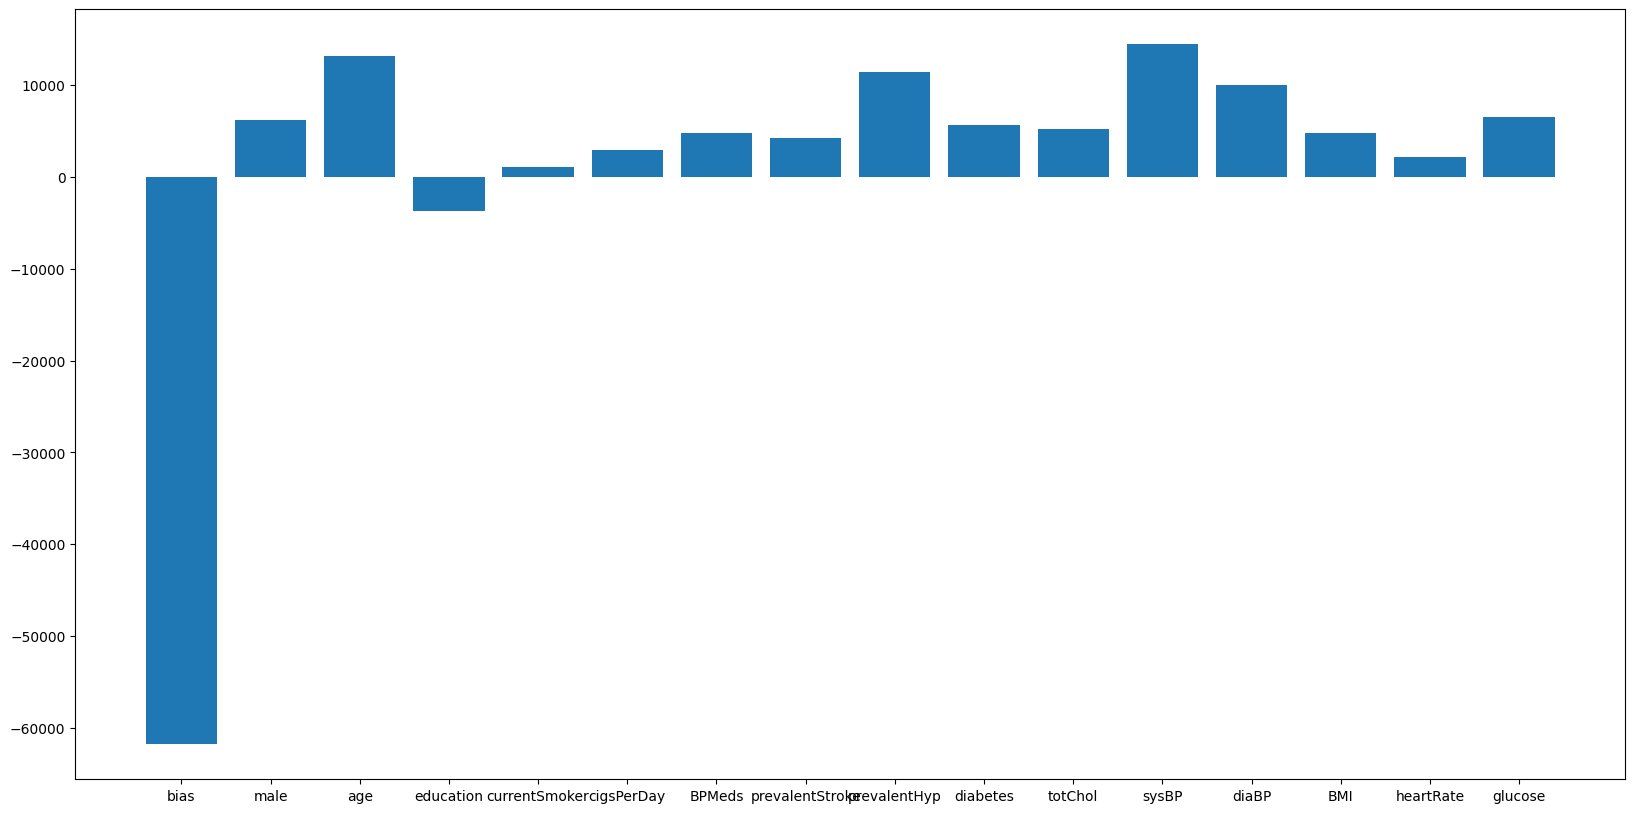

In [71]:
plt.figure(figsize=(20,10))
plt.bar(['bias']+list(heart_disease_df.drop('TenYearCHD',axis=1).columns),model.w.flatten())
plt.show()